<a href="https://colab.research.google.com/github/AbigailBojorquez/Edible-Mushrooms/blob/main/Copy_of_Project_2_(part_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier


## First Choice: Dataset 1

In [4]:
# Loading Data
path = '/content/drive/MyDrive/Coding Dojo/Project 2/Data/mushrooms.csv'
df = pd.read_csv(path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Check for duplicates and missing values
print('Missing data:\n', df.isna().sum())
print('\n')
print('Duplicates:', df.duplicated().sum())

Missing data:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


Duplicates: 0


# Dictionary
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Ploting & understanding our Data

> Here I wanted to see how much of poisonous mushrooms, and edible mushrooms we have in the data set. P is for poisonious and E is for edible. 

[Text(0.5, 1.0, 'Poisonas and Edible mushrooms in our Dataset')]

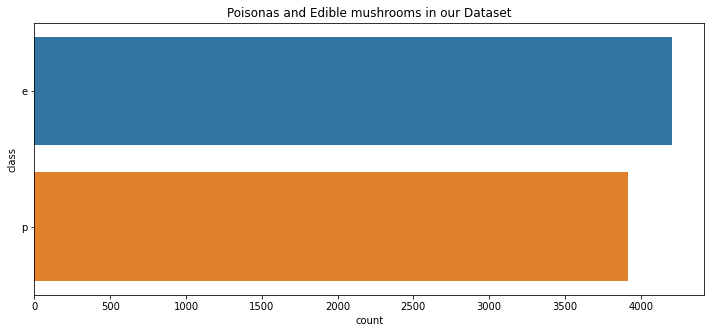

In [8]:
fig, ax = plt.subplots(figsize= (12,5))
sns.countplot(data= df, y='class',order= df['class'].value_counts().index,)
ax.set(title= 'Poisonas and Edible mushrooms in our Dataset')

# Correlating Data #1

In [17]:
def plot_col(col, hue=None, color=['red', 'orange'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=df, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

> Here I am creating a ore efficient way to plot my data, this will be used in the following code. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


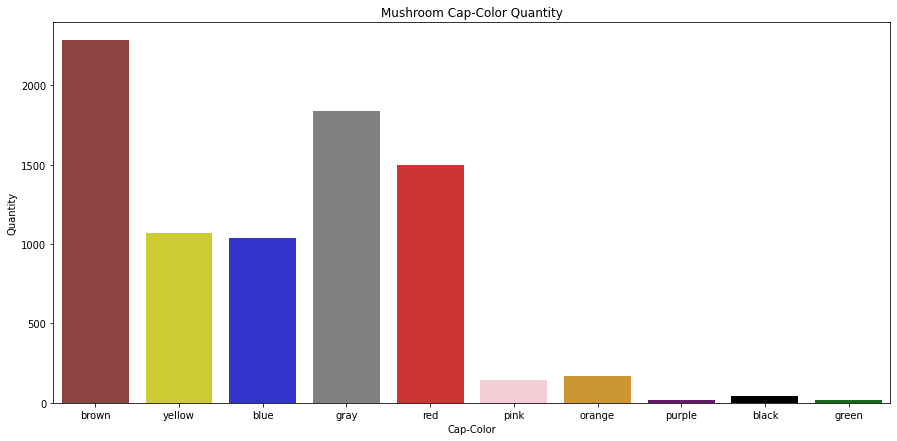

In [18]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"};
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict);

> With this plot, I wanted to see the quantitiy of each collor in our data set, so we have an idea of how many we have, and how much of it is there. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


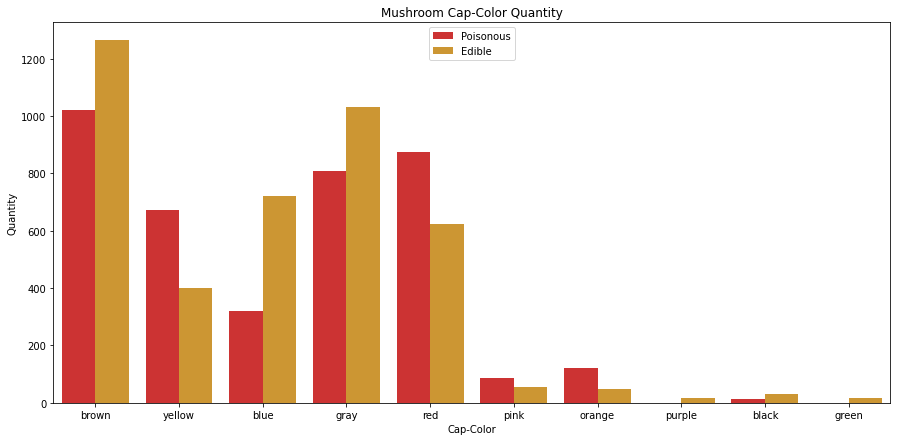

In [19]:
plot_col(col='cap-color', hue='class', labels=color_dict);

> Now we can see that I am comparing each color with the class. This graphs helps us see the colrolation between wether it is poisionous or edible. According to this graph, if the mushroom is blue, then it is most likely edible, same goes with greem. On the other hand, if the mushroom is yellow it most likely is poisonous. 

# Correlating Data #2

In [22]:
def plot_col2(col, hue=None, color=['red', 'blue'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=df, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


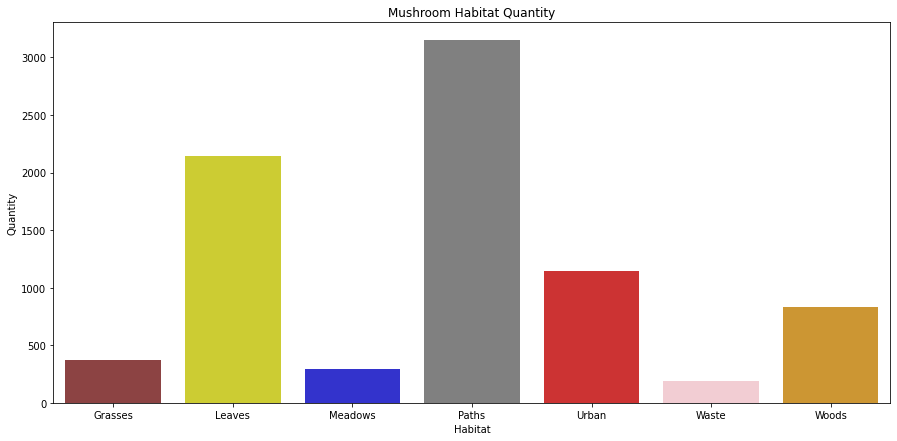

In [23]:
habitat_dict = { "Grasses":"0" , "Leaves":"1", "Meadows":"2", "Paths":"3", "Urban":"4", "Waste":"5", "Woods":"6"}
plot_col2(col='habitat', color=color_dict.keys(), labels= habitat_dict);

> Here I wanted to explain what habitats our mushrooms are found in. This is just able to give you a visualization. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


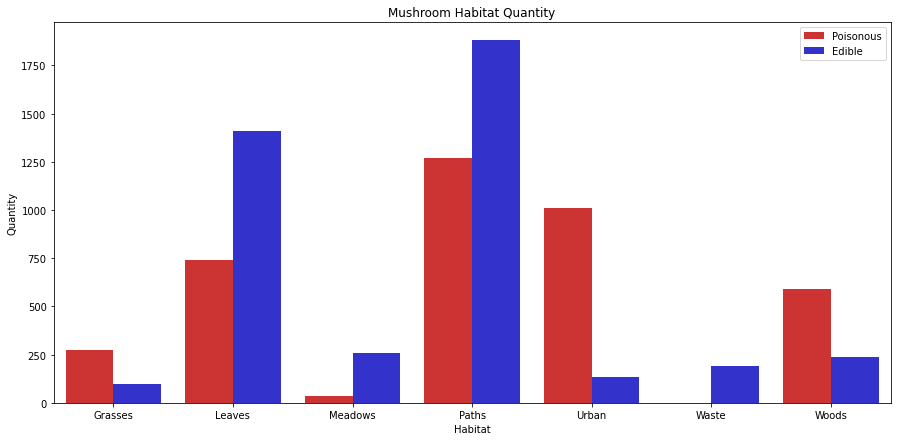

In [24]:
plot_col2(col='habitat', hue='class', labels= habitat_dict);

> In this visualization shows the amount of poisonous and edible mushroms located in each habitat. As we can see, we are more likely to find an edible mushroom in the Urban habitat, than in the Woods.